<a href="https://colab.research.google.com/github/sojeongii/cvcvcv/blob/main/cv_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 경로 지정


In [2]:
%cd drive/My\ Drive/2022_cv_project
!pwd
!ls -la

/content/drive/My Drive/2022_cv_project
/content/drive/My Drive/2022_cv_project
total 555814
drwx------ 2 root root      4096 May 26 08:36 checkpoints
drwx------ 2 root root      4096 May 26 11:54 cv_project
-rw------- 1 root root     85021 May 29 09:16 cv_project.ipynb
-rw------- 1 root root 453336073 May 25 01:24 cv_project.zip
drwx------ 2 root root      4096 May 26 08:23 CV_TermP
drwx------ 2 root root      4096 May 26 08:23 data
drwx------ 2 root root      4096 May 26 08:55 .ipynb_checkpoints
drwx------ 2 root root      4096 May 26 08:23 model
drwx------ 2 root root      4096 May 26 08:36 outputs
drwx------ 2 root root      4096 May 26 08:36 __pycache__
-rw------- 1 root root 115689009 May 18 04:53 test_dataset.zip
-rw------- 1 root root      1687 May 26 14:13 test.py
-rw------- 1 root root      4798 May 26 14:14 train.py
-rw------- 1 root root      1327 May 27 15:25 utils.py


# 압축 풀기

In [4]:
import tqdm
import zipfile
import os
import glob

# # 폴더 복사 하기
# import shutil
# shutil.copytree('./cv_project', './cv_project_na')

# # 파일 크기 확인
# filepaths = os.listdir('./cv_project/train')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/val')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/mask')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/hint')
# print(len(filepaths))

# # 압축 풀기
# file_name = 'test_dataset'
# !unzip -qq '{file_name}'

# # 파일 크기 확인
# filepaths = os.listdir('./cv_project/train')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/val')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/mask')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/hint')
# print(len(filepaths))
filepaths = os.listdir('./test_dataset')
print(len(filepaths))

2


## 더 빠른 GPU

Colab Pro를 사용하여 가장 빠른 GPU에 우선적으로 액세스하세요. Pro+의 경우 더 빠릅니다. 예를 들어 대부분의 표준 Colab 사용자가 속도가 느린 K80 GPU를 수신할 때 Colab Pro 사용자는 T4 또는 P100 GPU를 이용할 수 있습니다. 언제든지 다음 셀을 실행하여 할당된 GPU를 확인할 수 있습니다.

아래 코드 셀의 실행 결과가 ‘Not connected to a GPU’인 경우 메뉴의 런타임 &gt; 런타임 유형 변경에서 런타임을 변경하여 GPU 가속기를 사용 설정한 다음 코드 셀을 다시 실행하면 됩니다.

In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun May 29 09:20:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 추가 메모리

<p>Colab Pro를 구독하면 고용량 메모리 VM에 액세스할 수 있습니다&#40;사용 가능한 경우&#41;. Pro+에는 더 많은 메모리가 제공됩니다. 고용량 메모리 런타임을 사용하도록 노트북 환경설정을 지정하려면 런타임 &gt; '런타임 유형 변경' 메뉴를 선택한 다음 런타임 구성 드롭다운에서 고용량 RAM을 선택하세요.</p>
<p>언제든지 다음 코드 셀을 실행하여 사용 가능한 메모리 용량을 확인할 수 있습니다.</p>
아래 코드 셀의 실행 결과가 ‘Not using a high-RAM runtime’인 경우 메뉴의 런타임 &gt; 런타임 유형 변경에서 고용량 RAM 런타임을 사용 설정하고 런타임 구성 드롭다운에서 고용량 RAM을 선택한 다음 코드 셀을 다시 실행하면 됩니다.

In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Install pytorch-ssim, mssim
<p> pip install pytorch_msssim </p>
<p> pip install pytorch_ssim </p>

In [7]:
pip install pytorch_ssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytorch-ssim: filename=pytorch_ssim-0.1-py3-none-any.whl size=2026 sha256=90d354fb1c6be82dc9422100057ebdef3af31de55da41f6be714b65cbe45a16a
  Stored in directory: /root/.cache/pip/wheels/ee/20/09/ebf5e58bdf2560c760074cd140b7f7b0c882e216feabf1ae30
Successfully built pytorch-ssim


In [8]:
pip install pytorch_msssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Training

device 0 : Tesla P100-PCIE-16GB
train dataset:  10000
validation dataset:  2000
Epoch 1/30
----------


  0%|          | 1/2500 [00:02<1:27:08,  2.09s/it]

	 Loss 0.0071 (0.0071)	


 20%|██        | 502/2500 [02:50<02:54, 11.42it/s]

	 Loss 0.0088 (0.0087)	


 40%|████      | 1002/2500 [03:34<02:12, 11.35it/s]

	 Loss 0.0070 (0.0087)	


 60%|██████    | 1502/2500 [04:18<01:26, 11.58it/s]

	 Loss 0.0087 (0.0088)	


 80%|████████  | 2002/2500 [05:02<00:43, 11.35it/s]

	 Loss 0.0123 (0.0089)	


100%|██████████| 2500/2500 [05:46<00:00,  7.22it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [10:06<00:00,  1.21s/it]


 valid PSNR AVG : 31.8638 SSIM AVG : 1.0000
 valid Loss: 0.012 
==> best model saved - 0 / 0.012
Epoch 2/30
----------


  0%|          | 3/2500 [00:00<05:24,  7.69it/s]

	 Loss 0.0064 (0.0064)	


 20%|██        | 503/2500 [00:44<02:54, 11.44it/s]

	 Loss 0.0083 (0.0087)	


 40%|████      | 1003/2500 [01:28<02:11, 11.38it/s]

	 Loss 0.0105 (0.0087)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.51it/s]

	 Loss 0.0121 (0.0087)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.56it/s]

	 Loss 0.0105 (0.0087)	


100%|██████████| 2500/2500 [03:38<00:00, 11.43it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:40<00:00, 12.26it/s]


 valid PSNR AVG : 33.3785 SSIM AVG : 1.0000
 valid Loss: 0.011 
==> best model saved - 1 / 0.011
Epoch 3/30
----------


  0%|          | 3/2500 [00:00<05:20,  7.80it/s]

	 Loss 0.0149 (0.0149)	


 20%|██        | 503/2500 [00:44<02:56, 11.34it/s]

	 Loss 0.0141 (0.0084)	


 40%|████      | 1003/2500 [01:28<02:11, 11.40it/s]

	 Loss 0.0121 (0.0086)	


 60%|██████    | 1503/2500 [02:12<01:28, 11.33it/s]

	 Loss 0.0104 (0.0086)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.34it/s]

	 Loss 0.0083 (0.0086)	


100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:40<00:00, 12.25it/s]


 valid PSNR AVG : 34.5859 SSIM AVG : 1.0000
 valid Loss: 0.009 
==> best model saved - 2 / 0.009
Epoch 4/30
----------


  0%|          | 3/2500 [00:00<05:21,  7.78it/s]

	 Loss 0.0088 (0.0088)	


 20%|██        | 503/2500 [00:44<02:56, 11.30it/s]

	 Loss 0.0090 (0.0085)	


 40%|████      | 1003/2500 [01:28<02:12, 11.34it/s]

	 Loss 0.0070 (0.0086)	


 60%|██████    | 1503/2500 [02:12<01:26, 11.57it/s]

	 Loss 0.0084 (0.0086)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.52it/s]

	 Loss 0.0096 (0.0085)	


100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:40<00:00, 12.32it/s]


 valid PSNR AVG : 34.8752 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 5/30
----------


  0%|          | 3/2500 [00:00<05:29,  7.58it/s]

	 Loss 0.0073 (0.0073)	


 20%|██        | 503/2500 [00:44<02:53, 11.51it/s]

	 Loss 0.0084 (0.0086)	


 40%|████      | 1003/2500 [01:28<02:11, 11.41it/s]

	 Loss 0.0096 (0.0086)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.45it/s]

	 Loss 0.0079 (0.0086)	


 80%|████████  | 2003/2500 [02:55<00:42, 11.63it/s]

	 Loss 0.0111 (0.0085)	


100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:41<00:00, 12.17it/s]


 valid PSNR AVG : 35.1817 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 6/30
----------


  0%|          | 3/2500 [00:00<05:23,  7.73it/s]

	 Loss 0.0069 (0.0069)	


 20%|██        | 503/2500 [00:44<02:56, 11.33it/s]

	 Loss 0.0098 (0.0083)	


 40%|████      | 1003/2500 [01:28<02:11, 11.37it/s]

	 Loss 0.0100 (0.0084)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.37it/s]

	 Loss 0.0091 (0.0084)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.40it/s]

	 Loss 0.0076 (0.0084)	


100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.35it/s]


 valid PSNR AVG : 35.3805 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 7/30
----------


  0%|          | 3/2500 [00:00<05:19,  7.81it/s]

	 Loss 0.0076 (0.0076)	


 20%|██        | 503/2500 [00:44<02:55, 11.41it/s]

	 Loss 0.0050 (0.0085)	


 40%|████      | 1003/2500 [01:28<02:09, 11.53it/s]

	 Loss 0.0088 (0.0084)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.45it/s]

	 Loss 0.0106 (0.0084)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.42it/s]

	 Loss 0.0116 (0.0084)	


100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.37it/s]


 valid PSNR AVG : 34.4053 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 8/30
----------


  0%|          | 3/2500 [00:00<05:27,  7.63it/s]

	 Loss 0.0086 (0.0086)	


 20%|██        | 503/2500 [00:44<02:55, 11.35it/s]

	 Loss 0.0079 (0.0081)	


 40%|████      | 1003/2500 [01:28<02:15, 11.05it/s]

	 Loss 0.0117 (0.0083)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.35it/s]

	 Loss 0.0077 (0.0084)	


 80%|████████  | 2003/2500 [02:55<00:42, 11.56it/s]

	 Loss 0.0071 (0.0083)	


100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.28it/s]


 valid PSNR AVG : 33.7027 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 9/30
----------


  0%|          | 3/2500 [00:00<05:26,  7.64it/s]

	 Loss 0.0134 (0.0134)	


 20%|██        | 503/2500 [00:44<02:55, 11.40it/s]

	 Loss 0.0066 (0.0085)	


 40%|████      | 1003/2500 [01:28<02:11, 11.38it/s]

	 Loss 0.0090 (0.0084)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.45it/s]

	 Loss 0.0076 (0.0083)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.53it/s]

	 Loss 0.0112 (0.0083)	


100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.35it/s]


 valid PSNR AVG : 34.9751 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 10/30
----------


  0%|          | 3/2500 [00:00<05:17,  7.86it/s]

	 Loss 0.0091 (0.0091)	


 20%|██        | 503/2500 [00:44<02:54, 11.42it/s]

	 Loss 0.0103 (0.0083)	


 40%|████      | 1003/2500 [01:28<02:12, 11.26it/s]

	 Loss 0.0084 (0.0082)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.42it/s]

	 Loss 0.0058 (0.0083)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.43it/s]

	 Loss 0.0085 (0.0082)	


100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.33it/s]


 valid PSNR AVG : 34.9031 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 9 / 0.008
Epoch 11/30
----------


  0%|          | 3/2500 [00:00<05:23,  7.71it/s]

	 Loss 0.0046 (0.0046)	


 20%|██        | 503/2500 [00:44<02:56, 11.34it/s]

	 Loss 0.0094 (0.0082)	


 40%|████      | 1003/2500 [01:28<02:12, 11.31it/s]

	 Loss 0.0092 (0.0083)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.51it/s]

	 Loss 0.0091 (0.0082)	


 80%|████████  | 2003/2500 [02:55<00:42, 11.64it/s]

	 Loss 0.0085 (0.0082)	


100%|██████████| 2500/2500 [03:38<00:00, 11.45it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:41<00:00, 12.14it/s]


 valid PSNR AVG : 34.7190 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 12/30
----------


  0%|          | 3/2500 [00:00<05:19,  7.82it/s]

	 Loss 0.0076 (0.0076)	


 20%|██        | 503/2500 [00:44<02:56, 11.34it/s]

	 Loss 0.0082 (0.0081)	


 40%|████      | 1003/2500 [01:28<02:10, 11.44it/s]

	 Loss 0.0099 (0.0081)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.49it/s]

	 Loss 0.0123 (0.0081)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.42it/s]

	 Loss 0.0081 (0.0081)	


100%|██████████| 2500/2500 [03:38<00:00, 11.43it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.29it/s]


 valid PSNR AVG : 34.9108 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 11 / 0.008
Epoch 13/30
----------


  0%|          | 3/2500 [00:00<05:11,  8.03it/s]

	 Loss 0.0123 (0.0123)	


 20%|██        | 503/2500 [00:44<02:54, 11.43it/s]

	 Loss 0.0054 (0.0082)	


 40%|████      | 1003/2500 [01:28<02:11, 11.39it/s]

	 Loss 0.0095 (0.0081)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.50it/s]

	 Loss 0.0076 (0.0081)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.32it/s]

	 Loss 0.0066 (0.0081)	


100%|██████████| 2500/2500 [03:38<00:00, 11.44it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.34it/s]


 valid PSNR AVG : 34.8826 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 12 / 0.008
Epoch 14/30
----------


  0%|          | 3/2500 [00:00<05:24,  7.69it/s]

	 Loss 0.0055 (0.0055)	


 20%|██        | 503/2500 [00:44<02:53, 11.50it/s]

	 Loss 0.0096 (0.0081)	


 40%|████      | 1003/2500 [01:27<02:09, 11.55it/s]

	 Loss 0.0060 (0.0082)	


 60%|██████    | 1503/2500 [02:11<01:27, 11.42it/s]

	 Loss 0.0067 (0.0081)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.49it/s]

	 Loss 0.0092 (0.0081)	


100%|██████████| 2500/2500 [03:38<00:00, 11.45it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.29it/s]


 valid PSNR AVG : 34.2758 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 15/30
----------


  0%|          | 3/2500 [00:00<05:34,  7.47it/s]

	 Loss 0.0077 (0.0077)	


 20%|██        | 503/2500 [00:44<02:54, 11.45it/s]

	 Loss 0.0064 (0.0079)	


 40%|████      | 1003/2500 [01:28<02:11, 11.36it/s]

	 Loss 0.0115 (0.0080)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.36it/s]

	 Loss 0.0065 (0.0081)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.40it/s]

	 Loss 0.0094 (0.0080)	


100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.23it/s]


 valid PSNR AVG : 34.7061 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 16/30
----------


  0%|          | 3/2500 [00:00<05:28,  7.59it/s]

	 Loss 0.0074 (0.0074)	


 20%|██        | 503/2500 [00:44<02:56, 11.28it/s]

	 Loss 0.0090 (0.0080)	


 40%|████      | 1003/2500 [01:28<02:11, 11.34it/s]

	 Loss 0.0071 (0.0080)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.38it/s]

	 Loss 0.0067 (0.0081)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.38it/s]

	 Loss 0.0059 (0.0081)	


100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.30it/s]


 valid PSNR AVG : 34.8177 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 17/30
----------


  0%|          | 3/2500 [00:00<05:22,  7.75it/s]

	 Loss 0.0061 (0.0061)	


 20%|██        | 503/2500 [00:44<02:55, 11.37it/s]

	 Loss 0.0105 (0.0079)	


 40%|████      | 1003/2500 [01:28<02:12, 11.32it/s]

	 Loss 0.0080 (0.0079)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.43it/s]

	 Loss 0.0062 (0.0079)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.30it/s]

	 Loss 0.0074 (0.0080)	


100%|██████████| 2500/2500 [03:38<00:00, 11.43it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:41<00:00, 12.19it/s]


 valid PSNR AVG : 35.6080 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 16 / 0.008
Epoch 18/30
----------


  0%|          | 3/2500 [00:00<05:16,  7.88it/s]

	 Loss 0.0063 (0.0063)	


 20%|██        | 503/2500 [00:44<02:56, 11.34it/s]

	 Loss 0.0061 (0.0079)	


 40%|████      | 1003/2500 [01:28<02:11, 11.37it/s]

	 Loss 0.0065 (0.0079)	


 60%|██████    | 1503/2500 [02:11<01:27, 11.45it/s]

	 Loss 0.0075 (0.0079)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.41it/s]

	 Loss 0.0048 (0.0079)	


100%|██████████| 2500/2500 [03:38<00:00, 11.44it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.35it/s]


 valid PSNR AVG : 35.2438 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 19/30
----------


  0%|          | 3/2500 [00:00<05:17,  7.86it/s]

	 Loss 0.0096 (0.0096)	


 20%|██        | 503/2500 [00:44<02:55, 11.37it/s]

	 Loss 0.0073 (0.0079)	


 40%|████      | 1003/2500 [01:28<02:11, 11.36it/s]

	 Loss 0.0057 (0.0078)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.38it/s]

	 Loss 0.0058 (0.0079)	


 80%|████████  | 2003/2500 [02:55<00:42, 11.64it/s]

	 Loss 0.0118 (0.0079)	


100%|██████████| 2500/2500 [03:38<00:00, 11.43it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.29it/s]


 valid PSNR AVG : 35.4041 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 18 / 0.008
Epoch 20/30
----------


  0%|          | 3/2500 [00:00<05:15,  7.91it/s]

	 Loss 0.0099 (0.0099)	


 20%|██        | 503/2500 [00:44<02:53, 11.51it/s]

	 Loss 0.0067 (0.0080)	


 40%|████      | 1003/2500 [01:27<02:10, 11.47it/s]

	 Loss 0.0086 (0.0079)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.54it/s]

	 Loss 0.0059 (0.0079)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.48it/s]

	 Loss 0.0104 (0.0079)	


100%|██████████| 2500/2500 [03:38<00:00, 11.45it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.37it/s]


 valid PSNR AVG : 34.9897 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 21/30
----------


  0%|          | 3/2500 [00:00<05:22,  7.74it/s]

	 Loss 0.0112 (0.0112)	


 20%|██        | 503/2500 [00:43<02:54, 11.41it/s]

	 Loss 0.0057 (0.0078)	


 40%|████      | 1003/2500 [01:27<02:10, 11.45it/s]

	 Loss 0.0078 (0.0079)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.54it/s]

	 Loss 0.0074 (0.0079)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.49it/s]

	 Loss 0.0058 (0.0079)	


100%|██████████| 2500/2500 [03:38<00:00, 11.44it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.29it/s]


 valid PSNR AVG : 35.0921 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 22/30
----------


  0%|          | 3/2500 [00:00<05:19,  7.82it/s]

	 Loss 0.0089 (0.0089)	


 20%|██        | 503/2500 [00:44<02:56, 11.34it/s]

	 Loss 0.0078 (0.0078)	


 40%|████      | 1003/2500 [01:28<02:12, 11.28it/s]

	 Loss 0.0078 (0.0078)	


 60%|██████    | 1503/2500 [02:12<01:26, 11.52it/s]

	 Loss 0.0109 (0.0079)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.31it/s]

	 Loss 0.0109 (0.0079)	


100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.34it/s]


 valid PSNR AVG : 35.1738 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 23/30
----------


  0%|          | 3/2500 [00:00<05:28,  7.60it/s]

	 Loss 0.0082 (0.0082)	


 20%|██        | 503/2500 [00:44<02:55, 11.41it/s]

	 Loss 0.0094 (0.0078)	


 40%|████      | 1003/2500 [01:28<02:10, 11.45it/s]

	 Loss 0.0087 (0.0078)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.42it/s]

	 Loss 0.0070 (0.0078)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.47it/s]

	 Loss 0.0080 (0.0078)	


100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.21it/s]


 valid PSNR AVG : 34.2898 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 24/30
----------


  0%|          | 3/2500 [00:00<05:22,  7.74it/s]

	 Loss 0.0085 (0.0085)	


 20%|██        | 503/2500 [00:44<02:53, 11.53it/s]

	 Loss 0.0058 (0.0076)	


 40%|████      | 1003/2500 [01:27<02:12, 11.33it/s]

	 Loss 0.0066 (0.0076)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.52it/s]

	 Loss 0.0070 (0.0077)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.41it/s]

	 Loss 0.0081 (0.0077)	


100%|██████████| 2500/2500 [03:38<00:00, 11.45it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.36it/s]


 valid PSNR AVG : 35.2505 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 23 / 0.008
Epoch 25/30
----------


  0%|          | 3/2500 [00:00<05:17,  7.88it/s]

	 Loss 0.0070 (0.0070)	


 20%|██        | 503/2500 [00:44<02:55, 11.40it/s]

	 Loss 0.0046 (0.0077)	


 40%|████      | 1003/2500 [01:28<02:10, 11.47it/s]

	 Loss 0.0076 (0.0078)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.46it/s]

	 Loss 0.0048 (0.0078)	


 80%|████████  | 2003/2500 [02:54<00:43, 11.47it/s]

	 Loss 0.0078 (0.0078)	


100%|██████████| 2500/2500 [03:38<00:00, 11.46it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.42it/s]


 valid PSNR AVG : 35.1346 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 26/30
----------


  0%|          | 3/2500 [00:00<05:24,  7.69it/s]

	 Loss 0.0133 (0.0133)	


 20%|██        | 503/2500 [00:43<02:53, 11.51it/s]

	 Loss 0.0112 (0.0078)	


 40%|████      | 1003/2500 [01:27<02:09, 11.60it/s]

	 Loss 0.0125 (0.0078)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.53it/s]

	 Loss 0.0096 (0.0078)	


 80%|████████  | 2003/2500 [02:54<00:42, 11.57it/s]

	 Loss 0.0070 (0.0078)	


100%|██████████| 2500/2500 [03:38<00:00, 11.46it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.30it/s]


 valid PSNR AVG : 35.5829 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 27/30
----------


  0%|          | 3/2500 [00:00<05:20,  7.80it/s]

	 Loss 0.0063 (0.0063)	


 20%|██        | 503/2500 [00:44<02:54, 11.45it/s]

	 Loss 0.0077 (0.0077)	


 40%|████      | 1003/2500 [01:27<02:11, 11.41it/s]

	 Loss 0.0071 (0.0077)	


 60%|██████    | 1503/2500 [02:11<01:27, 11.37it/s]

	 Loss 0.0052 (0.0077)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.52it/s]

	 Loss 0.0058 (0.0077)	


100%|██████████| 2500/2500 [03:38<00:00, 11.45it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.36it/s]


 valid PSNR AVG : 35.4904 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 28/30
----------


  0%|          | 2/2500 [00:00<06:55,  6.01it/s]

	 Loss 0.0057 (0.0057)	


 20%|██        | 502/2500 [00:43<02:57, 11.23it/s]

	 Loss 0.0069 (0.0077)	


 40%|████      | 1002/2500 [01:27<02:12, 11.30it/s]

	 Loss 0.0063 (0.0077)	


 60%|██████    | 1502/2500 [02:11<01:28, 11.29it/s]

	 Loss 0.0070 (0.0077)	


 80%|████████  | 2002/2500 [02:55<00:43, 11.50it/s]

	 Loss 0.0078 (0.0077)	


100%|██████████| 2500/2500 [03:38<00:00, 11.45it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.34it/s]


 valid PSNR AVG : 33.9656 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 29/30
----------


  0%|          | 3/2500 [00:00<05:20,  7.79it/s]

	 Loss 0.0105 (0.0105)	


 20%|██        | 503/2500 [00:44<02:54, 11.47it/s]

	 Loss 0.0063 (0.0077)	


 40%|████      | 1003/2500 [01:28<02:10, 11.43it/s]

	 Loss 0.0094 (0.0078)	


 60%|██████    | 1503/2500 [02:12<01:29, 11.17it/s]

	 Loss 0.0053 (0.0078)	


 80%|████████  | 2003/2500 [02:55<00:43, 11.30it/s]

	 Loss 0.0073 (0.0077)	


100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.21it/s]


 valid PSNR AVG : 35.0851 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 30/30
----------


  0%|          | 3/2500 [00:00<05:35,  7.45it/s]

	 Loss 0.0084 (0.0084)	


 20%|██        | 503/2500 [00:44<02:54, 11.45it/s]

	 Loss 0.0071 (0.0078)	


 40%|████      | 1003/2500 [01:28<02:13, 11.23it/s]

	 Loss 0.0053 (0.0076)	


 60%|██████    | 1503/2500 [02:12<01:26, 11.52it/s]

	 Loss 0.0076 (0.0077)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.38it/s]

	 Loss 0.0082 (0.0077)	


100%|██████████| 2500/2500 [03:39<00:00, 11.38it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:41<00:00, 12.08it/s]


 valid PSNR AVG : 35.4669 SSIM AVG : 1.0000
 valid Loss: 0.008 
Training complete in 141m 24s
Best valid Acc: 23 - 0.0079


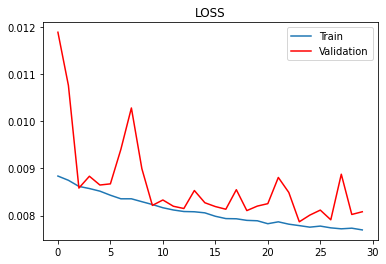

In [ ]:
import os
from data.dataset import ColorHintDataset
import torch.utils.data as data
import torch
import cv2
import tqdm
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from data.transform import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
# from model.att_unet.att_unet import Unet
import matplotlib.image as img
import copy, time
from model.res_unet.ra_unet import ResAttdUNet
from utils import AverageMeter, SSIM, psnr, save_img
from torchsummary import summary

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"
  print('device 0 :', torch.cuda.get_device_name(0))


def main():
    # Change to your data root directory
    root_path = "./cv_project"

    check_path = './checkpoints/'
    # Depend on runtime setting
    use_cuda = True

    # make the directory
    os.makedirs('./checkpoints/', exist_ok=True)
    os.makedirs('./outputs/', exist_ok=True)
    os.makedirs('./outputs/test', exist_ok=True)
    os.makedirs('./outputs/GroundTruth', exist_ok=True)
    os.makedirs('./outputs/Hint', exist_ok=True)
    os.makedirs('./outputs/Output', exist_ok=True)
    os.makedirs('./checkpoints', exist_ok=True)

    # Load the data
    train_dataset = ColorHintDataset(root_path, 256, "train")
    val_dataset = ColorHintDataset(root_path, 256, "val")

    dataloaders = {}
    dataloaders['train'] = torch.utils.data.DataLoader(train_dataset, batch_size=4, num_workers = 2, shuffle=True)
    dataloaders['valid'] = torch.utils.data.DataLoader(val_dataset, batch_size=4, num_workers = 2, shuffle=False)


    print('train dataset: ', len(train_dataset))
    print('validation dataset: ', len(val_dataset))


    # Select the model
    models = {'ResUnet': ResUnet(3), 'ResUnetPlusPlus': ResUnetPlusPlus(3), 'UNet': UNet(), 'ResAttdUnet' : ResAttdUNet()}
    model = ResAttdUNet().to(device)

    # load the model
    model.load_state_dict(torch.load('./checkpoints/model-epoch-29-losses-0.00804.pth'))

    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    # summary(model, (3, 256, 256))

    lmbda = lambda epoch : 0.95
    exp_lr_scehduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
    epochs = 30

    # initialize the
    since = time.time()
    train_loss, train_acc, valid_loss, valid_acc = [], [], [], []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 999
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            losses = AverageMeter()
            psnr_total = 0
            ssim_total = 0
            count = 0

            # Iterate over data.
            for i, data in enumerate(tqdm.tqdm(dataloaders[phase])):
                if use_cuda:
                    l = data["l"].to(device)
                    ab = data["ab"].to(device)
                    hint = data["hint"].to(device)
                else:
                    l = data["l"]
                    ab = data["ab"]
                    hint = data["hint"]

                gt_image = torch.cat((l, ab), dim=1)
                hint_image = torch.cat((l, hint), dim=1)
                hint_image = hint_image.float().to(device)
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(hint_image)
                    loss = criterion(outputs, ab)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        # zero the parameter gradients
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                losses.update(loss.item(), hint_image.size(0))

                if phase == 'train':
                  if i % 500 == 0:
                    print('\t Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(loss=losses))
                
                else:
                  outputs = torch.cat((l, outputs), dim = 1)
                  out_hint_np = tensor2im(outputs)
                  out_hint_bgr = cv2.cvtColor(out_hint_np, cv2.COLOR_LAB2BGR)

                  hint_np = tensor2im(hint_image)
                  hint_bgr = cv2.cvtColor(hint_np, cv2.COLOR_LAB2BGR)

                  gt_np = tensor2im(gt_image)
                  gt_bgr = cv2.cvtColor(gt_np, cv2.COLOR_LAB2BGR)
                  psnr, ssim = save_img(gt_bgr, hint_bgr, out_hint_bgr, i)
                  psnr_total += psnr
                  ssim_total += ssim

            if phase == 'train':
                exp_lr_scehduler.step()
                train_loss.append(losses.avg)

            else:
                print(' {} PSNR AVG : {:.4f} SSIM AVG : {:.4f}'.format(phase, psnr_total/len(dataloaders[phase]), ssim_total/len(dataloaders[phase])))
                valid_loss.append(losses.avg)

            print(' {} Loss: {:.3f} '.format(phase, losses.avg))

            # deep copy the model
            if phase == 'valid' and losses.avg < best_loss:
                best_idx = epoch
                best_loss = losses.avg
                best_model_wts = copy.deepcopy(model.state_dict())

                # Save model & checkpoint
                torch.save(model.state_dict(), './checkpoints/model-epoch-{}-losses-{:.5f}.pth'.format(epoch + 1, best_loss))

                print('==> best model saved - %d / %.3f' % (best_idx, best_loss))

    # Training Result
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best valid Acc: %d - %.4f' % (best_idx, best_loss))


    # Plot the training procedure
    epoch_axis = np.arange(0, epochs)
    plt.figure()
    plt.title('LOSS')
    plt.plot(epoch_axis, train_loss, epoch_axis, valid_loss, 'r-')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

if __name__ == '__main__':
    main()

# Test

In [9]:
from data.dataset import ColorHintDataset
import torch
import torch.utils.data as data
import cv2
import tqdm
import os
from data.dataset import tensor2im
from model.res_unet.ra_unet import ResAttdUNet
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"
  print('device 0 :', torch.cuda.get_device_name(0))
  
def main():
    # Change to your data root directory
    root_path = "./test_dataset"

    # Depend on runtime setting
    use_cuda = True

    test_dataset = ColorHintDataset(root_path, 256, 'test')

    dataloaders = {}
    dataloaders['test'] = torch.utils.data.DataLoader(test_dataset, batch_size = 1, shuffle=False)
    print('test dataset: ', len(test_dataset))


    # state_dict = torch.load(check_point)
    model = ResAttdUNet().to(device)
    model.load_state_dict(torch.load('./checkpoints/model-epoch-29-losses-0.00804.pth'))

    os.makedirs('./outputs', exist_ok=True)
    os.makedirs('./outputs/test', exist_ok=True)

    model.eval()
    with torch.no_grad():
      for i, data in enumerate(tqdm.tqdm(dataloaders['test'])):
          if use_cuda:
              l = data["l"].to(device)
              hint = data["hint"].to(device)
              file_name = data["file_name"][0]

          hint_image = torch.cat((l, hint), dim=1)
          hint_np = tensor2im(hint_image)
          hint_image = hint_image.float().to(device)

          output = model(hint_image).squeeze(1)
          output = torch.cat((l, output), dim = 1)
          out_hint_np = tensor2im(output)

          hint_bgr = cv2.cvtColor(hint_np, cv2.COLOR_LAB2BGR)
          out_hint_bgr = cv2.cvtColor(out_hint_np, cv2.COLOR_LAB2BGR)

          fname = str(file_name).replace("['", '')
          fname = fname.replace("']", '')

          cv2.imwrite("./outputs/test/"+fname, out_hint_bgr)

if __name__ == '__main__':
    main()

ImportError: ignored